# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Tong Minh Hieu Le
#### Student ID: 4098368


Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* CountVectorizer, TfidfVectorizer, LogisticRegression ... from sklearn
* ...

## Introduction
Generating Feature Representations for Clothing Reviews and Clothing Review Classification

## Importing libraries 

In [78]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from itertools import chain
"""Note: load glove embeddings and put them in a
   `KeyedVectors` so we can use `docvecs`.
"""
from gensim.models import KeyedVectors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from scipy.sparse import hstack



## Task 2. Generating Feature Representations for Clothing Items Reviews

### Task 2.1 Bag-of-words model

In [79]:
# Code to perform the task...
# Load the dataset from processed.csv 
df = pd.read_csv('processed.csv')
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed Review Text
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hopes wanted work initially petite usual ...
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,jumpsuit fun flirty fabulous time compliments
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt due adjustable front tie length leggings...
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,tracy reese dresses petite feet tall brand pre...
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,basket hte person store pick teh pale hte gorg...


In [80]:
df.shape

(19652, 11)

In [81]:
# Extract processed reviews from the DataFrame
processed_reviews = df['Processed Review Text'].tolist()

In [82]:
# index to test the token in each processed review
test_index = 1
processed_reviews[test_index]

'jumpsuit fun flirty fabulous time compliments'

In [83]:
# Create tokenized reviews, safely skipping test_indexty strings and NaN values
tk_reviews = [
    review.split(" ") if isinstance(review, str) and review.strip() else []
    for review in processed_reviews
]

In [84]:
tk_reviews[test_index]

['jumpsuit', 'fun', 'flirty', 'fabulous', 'time', 'compliments']

In [85]:
# Check for empty reviews in the tokenized data
def check_empty_reviews(tk_reviews):
    empty_count = 0
    for i, review in enumerate(tk_reviews):
        if not review:  # If review is empty
            empty_count += 1
            print(f"Empty review found at index {i}")
    
    print(f"Total empty reviews: {empty_count} out of {len(tk_reviews)}")
    print(f"Percentage of empty reviews: {(empty_count/len(tk_reviews)*100):.2f}%")
    
    # Get processed reviews
    processed_reviews = df['Processed Review Text'].tolist()
    
    # Check how many processed reviews are empty or NaN
    empty_processed = 0
    for review in processed_reviews:
        if not isinstance(review, str) or not review.strip():
            empty_processed += 1
            
    print(f"Total empty processed reviews: {empty_processed} out of {len(processed_reviews)}")
    print(f"Percentage of empty processed reviews: {(empty_processed/len(processed_reviews)*100):.2f}%")

# Check for empty reviews
check_empty_reviews(tk_reviews)

Total empty reviews: 0 out of 19652
Percentage of empty reviews: 0.00%
Total empty processed reviews: 0 out of 19652
Percentage of empty processed reviews: 0.00%


In [86]:
def stats_print(tk_reviews):
    words = list(chain.from_iterable(tk_reviews)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(tk_reviews))
    lens = [len(article) for article in tk_reviews]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [87]:
stats_print(tk_reviews)

Vocabulary size:  7529
Total number of tokens:  355505
Lexical diversity:  0.021178323792914306
Total number of reviews: 19652
Average review length: 18.09001628332994
Maximun review length: 47
Minimun review length: 1
Standard deviation of review length: 8.826348342078324


In [88]:
# Load the vocabulary from vocab.txt
vocab_dict = {}  # word to index
with open('vocab.txt', 'r') as f:
    for line in f:
        parts = line.strip().split(':')
        if len(parts) == 2:
            word, idx = parts
            vocab_dict[int(idx)] = word

vocab = list(vocab_dict.values())


In [89]:
# Check size of the vocabulary
len(vocab)

7529

In [90]:
# initialised the CountVectorizer
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) 

In [91]:
# check the vocab 
vocab 

['a-cup',
 'a-flutter',
 'a-frame',
 'a-kind',
 'a-line',
 'a-lines',
 'a-symmetric',
 'aa',
 'ab',
 'abbey',
 'abby',
 'abdomen',
 'ability',
 'abnormally',
 'abo',
 'abou',
 'above-the',
 'abroad',
 'abs',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessories',
 'accessorize',
 'accessorized',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompanying',
 'accomplish',
 'accordian',
 'account',
 'accurate',
 'accurately',
 'acetate',
 'achieve',
 'acrylic',
 'act',
 'action',
 'active',
 'activewear',
 'activities',
 'acts',
 'actual',
 'actuality',
 'ad',
 'ada',
 'add',
 'add-on',
 'added',
 'addict',
 'addicted',
 'adding',
 'addition',
 

In [92]:
# generate the count vector representation for all processed reviews
count_features = cVectorizer.fit_transform([' '.join(review) for review in tk_reviews]) 
print(count_features.shape)

(19652, 7529)


In [93]:
# generate the revert vocabulary which support to be used in the embedding
reversed__vocab_dict = {v: k for k, v in vocab_dict.items()}

In [94]:
# func to validate t
def validator(data_features, vocab, a_ind,tokenised_articles):
    print("Review ID:", df['Clothing ID'][a_ind]) # print out the Article ID
    print("--------------------------------------------")
    print("Review txt:",df['Processed Review Text'][a_ind]) # print out the txt of the article
    print("Review tokens:",tokenised_articles[a_ind]) # print out the tokens of the article
    print("--------------------------------------------\n")
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      # the value is 0 or 1 in for binary vector; an integer for count vector; and a float value for tfidf

    for word, value in zip(vocab, data_features.toarray()[a_ind]): 
        if value > 0:
            print(word+":"+str(value), end =' ')
    print("\n--------------------------------------------\n")
    for word, value in zip(vocab, data_features.toarray()[a_ind]): 
        if value > 0:
            print(str(reversed__vocab_dict[word])+":"+str(value), end =' ')


In [95]:
validator(count_features,vocab,0,tk_reviews)

Review ID: 1077
--------------------------------------------
Review txt: high hopes wanted work initially petite usual found outrageously fact zip reordered petite medium half nicely bottom half tight layer cheap net layers imo major design flaw net layer sewn directly zipper
Review tokens: ['high', 'hopes', 'wanted', 'work', 'initially', 'petite', 'usual', 'found', 'outrageously', 'fact', 'zip', 'reordered', 'petite', 'medium', 'half', 'nicely', 'bottom', 'half', 'tight', 'layer', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper']
--------------------------------------------

Vector representation:

bottom:1 cheap:1 design:1 directly:1 fact:1 flaw:1 found:1 half:2 high:1 hopes:1 imo:1 initially:1 layer:2 layers:1 major:1 medium:1 net:2 nicely:1 outrageously:1 petite:2 reordered:1 sewn:1 tight:1 usual:1 wanted:1 work:1 zip:1 zipper:1 
--------------------------------------------

687:1 1028:1 1716:1 1792:1 2289:1 2481:1 2602:1 2892

In [96]:
# check shape count features
count_features.shape

(19652, 7529)

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [97]:
def write_vectorFile(data_features, clothing_ids, filename):
    num = data_features.shape[0]  # the number of documents
    print("DEBUG_num_documents:", num)
    with open(filename, 'w') as out_file:
        for a_ind in range(num):  # loop through each document
            out_file.write(f"#{clothing_ids[a_ind]},")  # start with clothing ID
            
            # Get non-zero indices in the sparse row
            nonzero_indices = data_features[a_ind].nonzero()[1]
            if a_ind == 0:
                # Debugging output for the first document
                print("DEBUG_first_document:", a_ind)
                print("DEBUG_nonzero_indices:", nonzero_indices)

            # If there are any non-zero features
            if len(nonzero_indices) > 0:
                for f_ind in nonzero_indices:
                    value = data_features[a_ind][0, f_ind]  # safe, works because row shape is (1, n_features)
                    out_file.write(f"{f_ind}:{value} ")
            
            out_file.write('\n')  # new line for next review

In [98]:
cVector_file = "./count_vectors.txt" # file name of the count vector
write_vectorFile(count_features, df['Clothing ID'].tolist(), 'count_vectors.txt')

DEBUG_num_documents: 19652
DEBUG_first_document: 0
DEBUG_nonzero_indices: [ 687 1028 1716 1792 2289 2481 2602 2892 3010 3087 3193 3258 3549 3552
 3832 3934 4224 4234 4427 4639 5260 5668 6726 7092 7207 7406 7520 7522]


### Task 2.2. Models based on word embeddings:
Using the Glove as the language model
- Unweighted Word Embeddings (GloVe)
- TF-IDF Weighted Word Embeddings (GloVe)

In [99]:
# Add each tokenized review to the dataframe
df["tk_review_text"] = tk_reviews

In [100]:
# load the GloVe embeddings
with open('glove/glove.6B.50d.txt') as f:
    keys, weights = [], []
    for l in f:
        k, v = l.split(maxsplit=1)
        keys.append(k)
        weights.append(np.fromstring(v, sep=' '))
glove_embeddings = KeyedVectors(50, count=400000)
glove_embeddings.add_vectors(keys, weights)
preTGloVe_wv = glove_embeddings

Build the unweighted vector representation for each clothing review


In [101]:
def gen_docVecs(embeddings, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        if valid_keys:  # Only process if there are valid keys
            try:
                docvec = np.vstack([embeddings[term] for term in valid_keys])
                docvec = np.sum(docvec, axis=0)
                vecs[i,:] = docvec
            except Exception as e:
                print(f"Error processing document {i}: {e}")
        # If no valid keys, the vector remains as zeros
    return vecs

In [102]:
len(preTGloVe_wv)

800000

In [155]:
preTGloVe_wv.vector_size

50

In [103]:
# NOTE this can take some time to finish running
# Build the unweighted vector representation for the documents
preTGloVe_dvs = gen_docVecs(preTGloVe_wv,df['tk_review_text']) # generate document embeddings
np.isnan(preTGloVe_dvs).any().sum() # check if there are any NaN values in the document vectors

0

Build the weighted vector representation for each clothing review


In [104]:
# Generating TF-IDF Vectors
tVectorizer = TfidfVectorizer(analyzer = 'word', vocabulary=vocab)
tfidf_features = tVectorizer.fit_transform([' '.join(review) for review in tk_reviews])
tfidf_features.shape

(19652, 7529)

In [105]:
# Create tfidf weights based on the vocab_dict and tfidf_features
def create_tfidf_weights(tfidf_features, vocab_dict):
    """
    Create a list of word:weight dictionaries for each document
    
    Parameters:
    -----------
    tfidf_features : scipy.sparse.csr_matrix
        TF-IDF features from the TfidfVectorizer
    vocab : list
        List of vocabulary words
    vocab_dict : dict
        Dictionary mapping word indices to words
        
    Returns:
    --------
    list
        List of dictionaries, each containing word:weight pairs for a document
    """
    tfidf_weights = []
    
    # For each document
    for i in range(tfidf_features.shape[0]):
        # Get the document's sparse row
        row = tfidf_features[i]
        # Get non-zero indices and values
        nonzero_indices = row.nonzero()[1]
        nonzero_values = row.data
        
        # Create word:weight dictionary for this document
        wordweight_dict = {}
        for idx, weight in zip(nonzero_indices, nonzero_values):
            word = vocab_dict[idx]  # Get the word from vocab using the index
            wordweight_dict[word] = str(weight)  # Convert weight to string to match original function
            
        tfidf_weights.append(wordweight_dict)
        
    return tfidf_weights


In [106]:
# Get the TF-IDF weights
tfidf_weights = create_tfidf_weights(tfidf_features, vocab_dict)

In [107]:
tfidf_weights[0] # check the first review's word:weight dictionary

{'zipper': '0.13796655643162234',
 'zip': '0.15790936302533073',
 'work': '0.08942754431903749',
 'wanted': '0.10688230992054923',
 'usual': '0.1108979967093157',
 'tight': '0.09944270371682062',
 'sewn': '0.15731076193390778',
 'reordered': '0.20116611478729465',
 'petite': '0.17993461419688872',
 'outrageously': '0.2567966207221875',
 'nicely': '0.11400095142158763',
 'net': '0.4867876227942154',
 'medium': '0.09045659947118836',
 'major': '0.19468911285051188',
 'layers': '0.16401760637664864',
 'layer': '0.2738967869996706',
 'initially': '0.17097793161240013',
 'imo': '0.19309847172209627',
 'hopes': '0.16844705121993458',
 'high': '0.10509713403953778',
 'half': '0.29992142257858656',
 'found': '0.11016820762903567',
 'flaw': '0.1869368578273477',
 'fact': '0.14687037381367216',
 'directly': '0.22042366265962396',
 'design': '0.0981905331970358',
 'cheap': '0.13834681733551207',
 'bottom': '0.10490905048781156'}

In [108]:
# func build TF-IDF weighted document vectors
def weighted_docvecs(embeddings, tfidf, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        
        # Skip empty documents
        if not valid_keys:
            continue
            
        tf_weights = [float(tfidf[i].get(term, 0.)) for term in valid_keys]
        
        # Filter out terms with zero weights
        valid_terms_weights = [(term, w) for term, w in zip(valid_keys, tf_weights) if w > 0]
        
        # Skip if no terms have positive weights
        if not valid_terms_weights:
            continue
            
        # Unpack the filtered terms and weights
        valid_terms, weights = zip(*valid_terms_weights)
        
        # Create weighted vectors
        weighted = [embeddings[term] * w for term, w in zip(valid_terms, weights)]
        
        # Sum the weighted vectors
        docvec = np.vstack(weighted)
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    
    return vecs

In [109]:
# Build weighted 
weighted_preTGloVe_dvs = weighted_docvecs(preTGloVe_wv, tfidf_weights, df['tk_review_text'])

#### So on task 2, we build weighted, unweighted, and embedding representations for reviews, corresponding to weighted_preTGloVe_dvs, preTGloVe_dvs, and count_features.



## Task 3. Clothing Review Classification

Implement classification models to predict clothing review recommendations and compare different language models and information sources.

### 3.1 Q1: Language Model Comparisons
Let's move onto the document classification task, we have prepared before:
* the data features (count, unweighted, and weighted vectors) for all reviews, store in lists (`count_features`, and `preTGloVe_dvs`, `weighted_preTGloVe_dvs`);
* the list of labels.

In [110]:
# Get the labels as the target variable
labels = df['Recommended IND']

In [111]:
# Check the length of the labels
len(labels)

19652

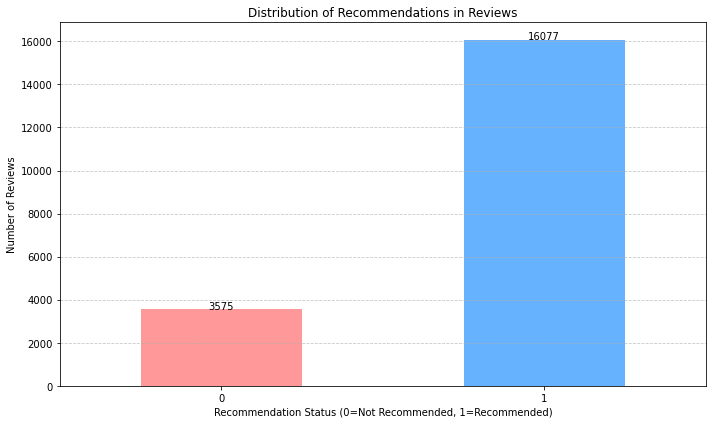

In [112]:
# Build to check the labels imbalance or balance
# Group data by Recommended IND and count occurrences
recommendation_counts = df.groupby('Recommended IND').size()

# Plot the distribution of recommendations
plt.figure(figsize=(10, 6))
recommendation_counts.plot(kind='bar', color=['#FF9999', '#66B2FF'])

# Add labels and title
plt.xlabel('Recommendation Status (0=Not Recommended, 1=Recommended)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Recommendations in Reviews')
plt.xticks(rotation=0)  # Keep x-labels horizontal

# Add count labels on top of bars
for i, count in enumerate(recommendation_counts):
    plt.text(i, count + 5, f'{count}', ha='center')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [113]:
# Calculate imbalance ratio
rec_ratio = recommendation_counts[1] / recommendation_counts[0]
print(f"Recommended to Not Recommended ratio: {rec_ratio:.2f}")

# Calculate percentage of each class
total = recommendation_counts.sum()
print(f"Not Recommended: {recommendation_counts[0]/total*100:.2f}%")
print(f"Recommended: {recommendation_counts[1]/total*100:.2f}%")

Recommended to Not Recommended ratio: 4.50
Not Recommended: 18.19%
Recommended: 81.81%


Note: The recommendation data is imbalanced, we should use F1-score to understand the performance of the models when accuracy alone can be misleading

In [114]:
labels = [int(label) for label in labels]

### 3.1.1 Classification Model Based on Count Vector Representation

In [115]:
# set the seed for reproducibility
seed = 0 

In [116]:
# creating training and test split
# With the imbalanced dataset, we will use stratified sampling which ensures that the proportion of classes in the training and test sets is similar to the original dataset.
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, labels, list(range(0,len(labels))),test_size=0.33, random_state=seed)

In [117]:
len(train_indices) + len(test_indices) # add up the total should be equal the total number of instances in the data set

19652

In [118]:
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

/Users/hieutong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [119]:
# predicting the labels of the test data
y_pred = model.predict(X_test)

In [120]:
# Check the miss classification
mis_count = 0
for i in range(0,len(y_pred)):
    if y_pred[i]!=y_test[i]:
        mis_count += 1
print("Total number of mis-classification: ", mis_count, "out of",len(y_pred),"test instances,",\
      str(mis_count/len(y_pred)*100.0)+"%.")

Total number of mis-classification:  811 out of 6486 test instances, 12.503854455750849%.


In [121]:
# Score the model
model.score(X_test, y_test)

0.8749614554424915

Confusion matrix, without normalization
[[ 659  539]
 [ 272 5016]]
Normalized confusion matrix
[[0.55008347 0.44991653]
 [0.05143722 0.94856278]]


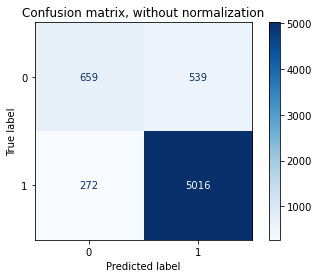

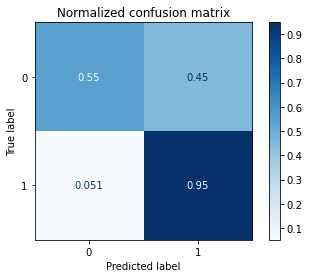

In [122]:
# Confusion matrix
categories = sorted(list(set(labels))) # this gives sorted set of unique label names

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')] # titles of different versions of the confusion matrix

for title, normalize in titles_options: # for each option, creates the confusion matrix visualzation
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize) # create the plot object
    disp.ax_.set_title(title) # attach the title to the plot

    # prints the title and actual confusion matrix
    print(title) 
    print(disp.confusion_matrix)

plt.show() # shows the plots

In [123]:
# Confusion matrix report
print(classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended']))

                 precision    recall  f1-score   support

Not Recommended       0.71      0.55      0.62      1198
    Recommended       0.90      0.95      0.93      5288

       accuracy                           0.87      6486
      macro avg       0.81      0.75      0.77      6486
   weighted avg       0.87      0.87      0.87      6486



#### Analysis:
- The model achieves 87% accuracy, which is good but misleading due to class imbalance.
- With not recommended: it misses 45% of negative reviews, F1-score is 0.62.
- With recommended: The model performs well on positive reviews with F1-score of 0.93.
- The F1-score for "Not Recommended" class (0.62) is significantly lower than for "Recommended" class (0.93), indicating the model struggles with identifying negative reviews.
- This imbalance in F1-scores confirms that we need to focus on improving the model's ability to detect negative reviews rather than just looking at overall accuracy.

### 3.1.2 Classification Model Based on Unweighted Vector Representation


In [124]:
X_train, X_test, y_train, y_test = train_test_split(preTGloVe_dvs, labels, test_size=0.33, random_state=seed)
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/hieutong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8254702436016035

Confusion matrix, without normalization
[[ 183 1015]
 [ 117 5171]]
Normalized confusion matrix
[[0.15275459 0.84724541]
 [0.02212557 0.97787443]]


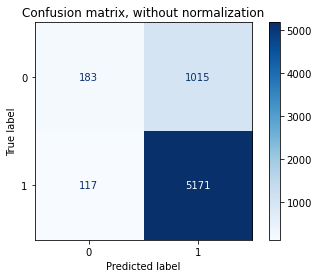

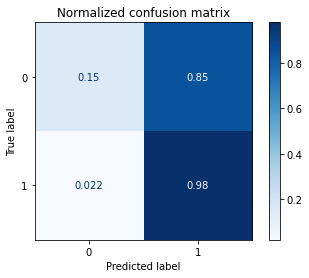

In [125]:
# Confusion matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')] # titles of different versions of the confusion matrix

for title, normalize in titles_options: # for each option, creates the confusion matrix visualzation
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize) # create the plot object
    disp.ax_.set_title(title) # attach the title to the plot

    # prints the title and actual confusion matrix
    print(title) 
    print(disp.confusion_matrix)

plt.show() # shows the plots

In [126]:
unWeighted_pred = model.predict(X_test)

# Report the confusion matrix
print(classification_report(y_test, unWeighted_pred, target_names=['Not Recommended', 'Recommended']))

                 precision    recall  f1-score   support

Not Recommended       0.61      0.15      0.24      1198
    Recommended       0.84      0.98      0.90      5288

       accuracy                           0.83      6486
      macro avg       0.72      0.57      0.57      6486
   weighted avg       0.79      0.83      0.78      6486



#### Analysis:

- Only 15.3% of negative reviews are correctly identified.
- 84.7% of negative reviews are misclassified as positive.
- Recommendation class bias: positive reviews were correctly identified (97.8%) which marks poor performance on the negative ones.
- Overall is 83% accuracy.
- Only 0.24 F1-score for "Not Recommended" class.
- It indicates that the model underperforming on negative class.


### 3.1.3 Classification Model Based on weighted Vector Representation


In [127]:
X_train, X_test, y_train, y_test = train_test_split(weighted_preTGloVe_dvs, labels, test_size=0.33, random_state=seed)
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/hieutong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8267036694418748

Confusion matrix, without normalization
[[ 158 1040]
 [  84 5204]]
Normalized confusion matrix
[[0.13188648 0.86811352]
 [0.01588502 0.98411498]]


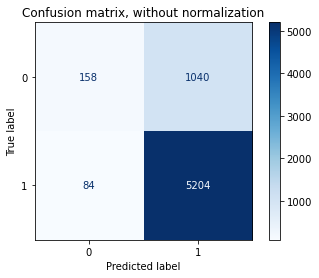

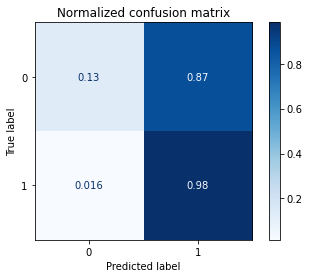

In [128]:
# Confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')] # titles of different versions of the confusion matrix

for title, normalize in titles_options: # for each option, creates the confusion matrix visualzation
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize) # create the plot object
    disp.ax_.set_title(title) # attach the title to the plot

    # prints the title and actual confusion matrix
    print(title) 
    print(disp.confusion_matrix)

plt.show() # shows the plots

In [129]:
# Generate predictions for the current model
weighted_pred = model.predict(X_test)
# Print out the classification report
print(classification_report(y_test, weighted_pred, target_names=['Not Recommended', 'Recommended']))

                 precision    recall  f1-score   support

Not Recommended       0.65      0.13      0.22      1198
    Recommended       0.83      0.98      0.90      5288

       accuracy                           0.83      6486
      macro avg       0.74      0.56      0.56      6486
   weighted avg       0.80      0.83      0.78      6486



#### Analysis:
- Extremely poor performance on negative class with only 13.2% correctly identified, 86.8% of negative reviews missclassified.
- Strong result for recommend class with 98% which means that the model learned to predict "Recommend" for everything.
- 83% accuracy is inflated by the class imbalance.
- F1 score of negative class is just 0.22.

### 3.1.4 Classification Model Based with cross validation


Let's build it with cross-validation and observe how each model performs.

In [130]:
# Define the kFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=0, shuffle=True)


In [131]:
def evaluate(X_train, X_test, y_train, y_test, seed):
    model = LogisticRegression(random_state=seed, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')  # Use 'weighted' or 'macro' if needed

    return acc, f1


In [132]:
# Create separate DataFrames for accuracy and F1
metrics_f1 = ['count_f1_review', 'unweighted_f1_review', 'weighted_f1_review']
metrics_acc = ['count_acc_review', 'unweighted_acc_review', 'weighted_acc_review']

cv_df_f1 = pd.DataFrame(columns=metrics_f1, index=range(num_folds))
cv_df_acc = pd.DataFrame(columns=metrics_acc, index=range(num_folds))

In [133]:
fold = 0
for train_index, test_index in kf.split(list(range(0, len(labels)))):
    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    acc, f1 = evaluate(count_features[train_index], count_features[test_index], y_train, y_test, seed)
    cv_df_f1.loc[fold, 'count_f1_review'] = f1
    cv_df_acc.loc[fold, 'count_acc_review'] = acc

    acc, f1 = evaluate(preTGloVe_dvs[train_index], preTGloVe_dvs[test_index], y_train, y_test, seed)
    cv_df_f1.loc[fold, 'unweighted_f1_review'] = f1
    cv_df_acc.loc[fold, 'unweighted_acc_review'] = acc

    acc, f1 = evaluate(weighted_preTGloVe_dvs[train_index], weighted_preTGloVe_dvs[test_index], y_train, y_test, seed)
    cv_df_f1.loc[fold, 'weighted_f1_review'] = f1
    cv_df_acc.loc[fold, 'weighted_acc_review'] = acc

    fold += 1

In [134]:
cv_df_acc # show the accuracy for each fold


,count_acc_review,unweighted_acc_review,weighted_acc_review
0,0.873823,0.823963,0.823709
1,0.876113,0.828542,0.830069
2,0.875573,0.825191,0.822646
3,0.864122,0.816031,0.819593
4,0.880153,0.832824,0.829771


In [135]:
# mean accuracy
cv_df_acc.mean() 

count_acc_review         0.873957
unweighted_acc_review    0.825310
weighted_acc_review      0.825158
dtype: float64

In [136]:
# Show F1 score for cross validation
cv_df_f1

,count_f1_review,unweighted_f1_review,weighted_f1_review
0,0.924459,0.900231,0.900645
1,0.926313,0.903217,0.904544
2,0.925763,0.900994,0.899986
3,0.91882,0.895566,0.898235
4,0.928991,0.905617,0.904388


In [137]:
cv_df_f1.mean() # mean F1 score for all the folds

count_f1_review         0.924869
unweighted_f1_review    0.901125
weighted_f1_review      0.901559
dtype: float64

From above experiments, we conducted training and evaluation of **logistic regression models** using three different feature representations for reviews:

- **Count Vector (Bag-of-Words)**
- **Unweighted GloVe Embeddings**
- **TF-IDF Weighted GloVe Embeddings**

Each model was evaluated using **5-fold cross-validation**.

---

### Key Findings
- Count vector superiority: the bag-of-words approach consistently outperformed both GloVe-based methods across all folds. It achieved an average F1-score of 0.925, which is about 2.3% higher than the embedding-based models. With accuracy, the average of the bag-of-words is 0.87 which is around 4.8% higher than ones.
- Minimal benefit from TF-IDF Weighting : the difference between unweighted and TF-IDF weighted GloVe embeddings was very small—just 0.0004 in F1-score—showing that TF-IDF weighting adds almost no value for this classification.
- Consistency across folds: the count vector method had the highest F1-score and accuracy in every fold, with only a small variation, indicating reliable and stable performance regardless of how the data is split.
- Embedding methods are similar: both unweighted and weighted GloVe embeddings performed similarly, averaging around 0.901 in F1-score, meaning there’s little difference in their effectiveness.

---

### Analysis

- The strong results from count vectors suggest that simply knowing which words appear may be more important. There are likely clear keywords that indicate whether a review is recommending the product.
- Count vectors also have the advantage of being simpler and faster to compute, without sacrificing accuracy.
- Looking closer at the results, the bag-of-words model not only performs better but also is more stable across different data splits. This tells us that lexical features—specific words and their frequency—are reliable predictors in clothing recommendation classification.
- Although word embeddings are designed to capture semantic relationships between words, they do not perform well in here. This is probably because specific vocabulary is more directly linked to recommendation status than subtle semantic meanings.

### 3.2 Q2: Does More Information Provide Higher Accuracy?
##### 3.2.1 only title of the review

In [138]:
# Get review titles
review_titles = df['Title'].fillna('')

# Process titles with the same vectorizers used for review text
# 1. Count vectors for titles
title_count_features = cVectorizer.fit_transform([' '.join(title.split()) for title in review_titles])

# 2. TF-IDF vectors for titles
title_tfidf_features = tVectorizer.fit_transform([' '.join(title.split()) for title in review_titles])

# 3. Process titles for GloVe embeddings
# Tokenize titles and filter out invalid words
tokenized_titles = []
for title in review_titles:
    if isinstance(title, str):
        tokens = title.lower().split()
        valid_tokens = [token for token in tokens if token in preTGloVe_wv]
        tokenized_titles.append(valid_tokens)
    else:
        tokenized_titles.append([])


# Generate document vectors for titles using unweighted GloVe
title_glove_dvs = gen_docVecs(preTGloVe_wv, tokenized_titles)

# Generate document vectors for titles using weighted GloVe
# First get TF-IDF weights for titles
title_tfidf_weights = create_tfidf_weights(title_tfidf_features, vocab_dict)

# Then create weighted document vectors
title_weighted_glove_dvs = weighted_docvecs(preTGloVe_wv, title_tfidf_weights, tokenized_titles)

Classification Model the data features (count, unweighted, and weighted vectors) for all titles, store in lists (`title_count_features`, and `title_glove_dvs`, `title_weighted_glove_dvs`);

##### 3.2.1.1 Classification each model

In [139]:
# Instead of building logistic regression models for each feature representation like reviews, create generic function, then call it for each representation
def evaluate_title_features(feature_name, feature_data, labels, seed=0):
    """
    Evaluate a feature representation by training a logistic regression model,
    computing confusion matrices, and printing classification report.
    
    Parameters:
    -----------
    feature_name : str
        Name of the feature representation being evaluated
    feature_data : array or sparse matrix
        Feature data to be used for classification
    labels : list or array
        Target labels for classification
    seed : int, default=0
        Random seed for reproducibility
    
    Returns:
    --------
    float
        Accuracy score of the model on the test set
    """
    print(f"\n{'='*20} Evaluating {feature_name} {'='*20}")
    
    # Check for NaN values and replace with zeros if needed
    if isinstance(feature_data, np.ndarray) and np.isnan(feature_data).any():
        print(f"Warning: Found {np.isnan(feature_data).any(axis=1).sum()} documents with NaN values")
        print("Replacing NaN values with zeros")
        feature_data = np.nan_to_num(feature_data)
    
    # Create train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        feature_data, labels, test_size=0.33, random_state=seed
    )
    
    # Train logistic regression model
    model = LogisticRegression(random_state=seed, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = model.score(X_test, y_test)
    print(f"Model accuracy: {accuracy:.4f}")
    
    # Plot confusion matrices
    categories = sorted(list(set(labels)))
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", 'true')
    ]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(
            model, X_test, y_test,
            display_labels=categories,
            cmap=plt.cm.Blues,
            normalize=normalize
        )
        disp.ax_.set_title(f"{feature_name}: {title}")
        print(title) 
        print(disp.confusion_matrix)
    
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Recommended', 'Recommended']))
    
    return accuracy


==================== Evaluating Title Count Vectors ====================
Model accuracy: 0.8631
Confusion matrix, without normalization
[[ 452  746]
 [ 142 5146]]
Normalized confusion matrix
[[0.37729549 0.62270451]
 [0.02685325 0.97314675]]


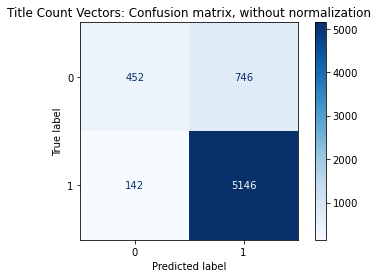

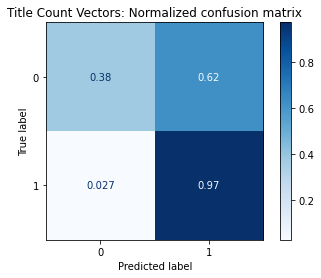


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.76      0.38      0.50      1198
    Recommended       0.87      0.97      0.92      5288

       accuracy                           0.86      6486
      macro avg       0.82      0.68      0.71      6486
   weighted avg       0.85      0.86      0.84      6486


==================== Evaluating Title GloVe Embeddings ====================
Model accuracy: 0.8219
Confusion matrix, without normalization
[[ 289  909]
 [ 246 5042]]
Normalized confusion matrix
[[0.24123539 0.75876461]
 [0.04652042 0.95347958]]


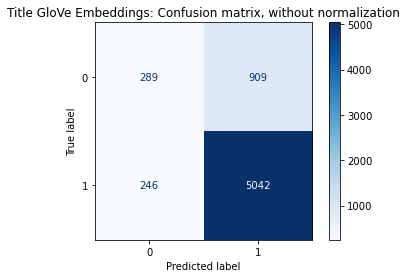

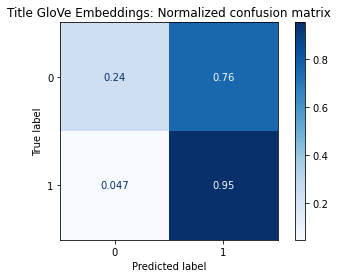


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.54      0.24      0.33      1198
    Recommended       0.85      0.95      0.90      5288

       accuracy                           0.82      6486
      macro avg       0.69      0.60      0.62      6486
   weighted avg       0.79      0.82      0.79      6486


==================== Evaluating Title Weighted GloVe Embeddings ====================
Model accuracy: 0.8276
Confusion matrix, without normalization
[[ 220  978]
 [ 140 5148]]
Normalized confusion matrix
[[0.1836394  0.8163606 ]
 [0.02647504 0.97352496]]


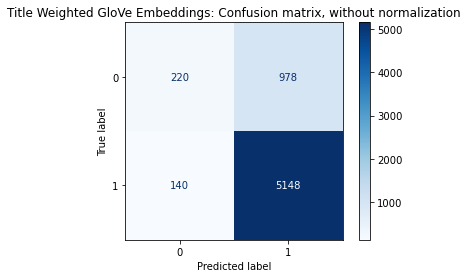

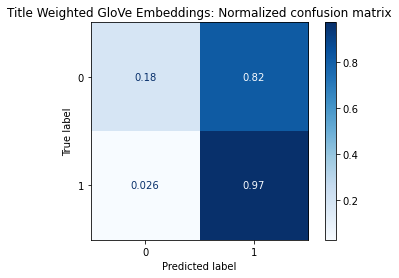


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.61      0.18      0.28      1198
    Recommended       0.84      0.97      0.90      5288

       accuracy                           0.83      6486
      macro avg       0.73      0.58      0.59      6486
   weighted avg       0.80      0.83      0.79      6486



In [140]:
# Handle potential NaN values in title_glove_dvs
title_glove_dvs = np.nan_to_num(title_glove_dvs)
title_weighted_glove_dvs = np.nan_to_num(title_weighted_glove_dvs)

# Evaluate all three title feature representations
title_results = {}
title_results['Count Vectors'] = evaluate_title_features("Title Count Vectors", 
                                                        title_count_features, 
                                                        labels, 
                                                        seed)

title_results['GloVe Embeddings'] = evaluate_title_features("Title GloVe Embeddings", 
                                                           title_glove_dvs, 
                                                           labels, 
                                                           seed)

title_results['Weighted GloVe Embeddings'] = evaluate_title_features("Title Weighted GloVe Embeddings", 
                                                                   title_weighted_glove_dvs, 
                                                                   labels, 
                                                                   seed)

### Title Classification Analysis

Based on the confusion matrix and classification reports for the title features:

#### Count Vector (Bag-of-Words) for Titles
- Performance: Achieves the highest accuracy (86%) and F1-score (0.92).

#### Unweighted GloVe Embeddings for Titles

- Performance: reaches 82% accuracy and a 0.90 F1-score, which is lower than the count vector model.
- Class imbalance issue: struggles significantly with negative reviews, identifying only about 24% of them correctly.
- Positive class bias: Very high recall for positive reviews, suggesting a strong tendency to predict the "Recommended" class.

#### TF-IDF Weighted GloVe Embeddings for Titles

- Performance: slightly better than unweighted embeddings, achieving 83% accuracy and a 0.9 F1-score.
- Minimal improvement: The addition of TF-IDF weighting results in only a small improvement (0.1% increase in F1-score).

##### 3.2.1.2 Classification model with cross validation

In [141]:
# Create separate DataFrames for accuracy and F1 for title features
metrics_f1_title = ['count_f1_title', 'unweighted_f1_title', 'weighted_f1_title']
metrics_acc_title = ['count_acc_title', 'unweighted_acc_title', 'weighted_acc_title']

cv_df_f1_title = pd.DataFrame(columns=metrics_f1_title, index=range(num_folds))
cv_df_acc_title = pd.DataFrame(columns=metrics_acc_title, index=range(num_folds))

fold = 0
for train_index, test_index in kf.split(list(range(0, len(labels)))):
    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    # Evaluate title count vectors
    acc, f1 = evaluate(title_count_features[train_index], title_count_features[test_index], y_train, y_test, seed)
    cv_df_f1_title.loc[fold, 'count_f1_title'] = f1
    cv_df_acc_title.loc[fold, 'count_acc_title'] = acc

    # Evaluate unweighted GloVe embeddings for titles
    acc, f1 = evaluate(title_glove_dvs[train_index], title_glove_dvs[test_index], y_train, y_test, seed)
    cv_df_f1_title.loc[fold, 'unweighted_f1_title'] = f1
    cv_df_acc_title.loc[fold, 'unweighted_acc_title'] = acc

    # Evaluate weighted GloVe embeddings for titles
    acc, f1 = evaluate(title_weighted_glove_dvs[train_index], title_weighted_glove_dvs[test_index], y_train, y_test, seed)
    cv_df_f1_title.loc[fold, 'weighted_f1_title'] = f1
    cv_df_acc_title.loc[fold, 'weighted_acc_title'] = acc

    fold += 1

In [142]:
cv_df_acc_title

,count_acc_title,unweighted_acc_title,weighted_acc_title
0,0.865683,0.819384,0.825998
1,0.867973,0.832358,0.831849
2,0.867176,0.838931,0.82799
3,0.860305,0.827481,0.827226
4,0.867684,0.831298,0.833333


In [143]:
cv_df_acc_title.mean() # mean accuracy for all the folds

count_acc_title         0.865764
unweighted_acc_title    0.829890
weighted_acc_title      0.829279
dtype: float64

In [144]:
cv_df_f1_title

,count_f1_title,unweighted_f1_title,weighted_f1_title
0,0.92187,0.895404,0.900783
1,0.923755,0.904062,0.904741
2,0.923054,0.90728,0.902397
3,0.918389,0.900906,0.901236
4,0.923709,0.90331,0.90566


In [145]:
cv_df_f1_title.mean()

count_f1_title         0.922155
unweighted_f1_title    0.902192
weighted_f1_title      0.902964
dtype: float64

From above experiments, we conducted training and evaluation of **logistic regression models** using three different feature representations for titles:

- **Count Vector (Bag-of-Words)**
- **Unweighted GloVe Embeddings**
- **TF-IDF Weighted GloVe Embeddings**

Each model was evaluated using **5-fold cross-validation**.
### **Key Findings**

- Bag-of-Words still performs well: the count vector model (bag-of-words) consistently outperforms the GloVe-based models across all five folds. On average, it scores about 2% higher in F1-score and 4% in accuracy.
- TF-IDF weighting adds little: there's barely any difference between the weighted and unweighted GloVe embeddings—just a 0.0008 (or 0.08%) improvement. This shows that adding TF-IDF weighting doesn’t really help for classifying titles.
- Titles carry strong signals: all models achieved F1-scores above 0.9 using just the review titles. This means that titles alone provide a lot of useful information for predicting whether a product is recommended or not.
- Consistent results with count vectors: the count vector approach not only performs the best but also does so consistently, with the smallest variation across folds.

---

### **Analysis**
- The strong performance of count vectors suggests that just identifying which words are present—without needing to understand their meaning—can be more useful for this task. This implies that certain words strongly signal whether a review recommends the product or not.
- The tiny performance gap between weighted and unweighted embeddings shows that adjusting for word frequency (like with TF-IDF) does not add much value here. That would probably be correct because titles are short and to the point, meaning that just knowing which words are used is already very informative.
- Without using the full review, titles alone give excellent results. For building efficient models—processing, we could only use the title which is much faster and still gives the high accuracy.
- For applications in this case, a title-based bag-of-words model could work really well as a first step which makes the system both accurate and efficient.


##### 3.2.2 Classification Model both title and review

In [146]:
# Create combined features
# 1. Combine bag-of-words count vectors
combined_count_features = hstack([title_count_features, count_features])

# 2. Combine unweighted GloVe embeddings
combined_glove_dvs = np.hstack([title_glove_dvs, preTGloVe_dvs])

# 3. Combine weighted GloVe embeddings
combined_weighted_glove_dvs = np.hstack([title_weighted_glove_dvs, weighted_preTGloVe_dvs])



==== EVALUATING COMBINED FEATURES (TITLE + REVIEW TEXT) ====


==================== Evaluating Combined Count Vectors ====================
Model accuracy: 0.8902
Confusion matrix, without normalization
[[ 722  476]
 [ 236 5052]]
Normalized confusion matrix
[[0.60267112 0.39732888]
 [0.04462935 0.95537065]]


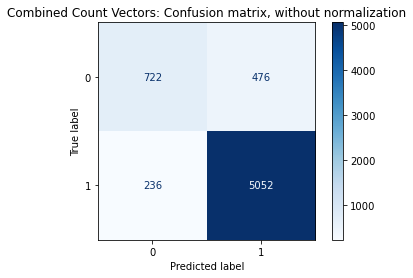

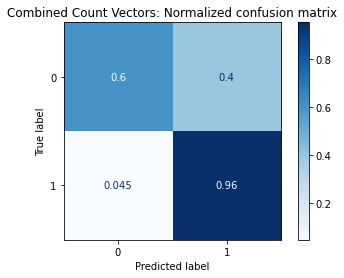


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.75      0.60      0.67      1198
    Recommended       0.91      0.96      0.93      5288

       accuracy                           0.89      6486
      macro avg       0.83      0.78      0.80      6486
   weighted avg       0.88      0.89      0.89      6486


==================== Evaluating Combined GloVe Embeddings ====================


/Users/hieutong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.8440
Confusion matrix, without normalization
[[ 440  758]
 [ 254 5034]]
Normalized confusion matrix
[[0.3672788  0.6327212 ]
 [0.04803328 0.95196672]]


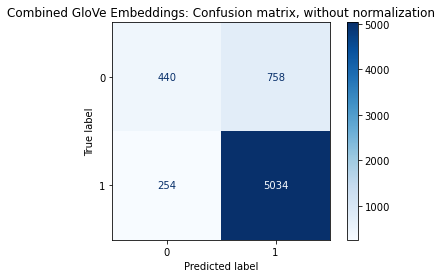

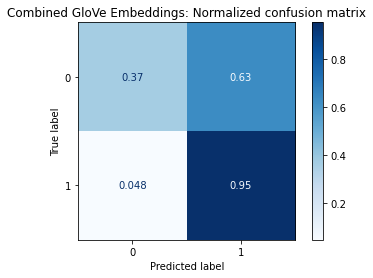


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.63      0.37      0.47      1198
    Recommended       0.87      0.95      0.91      5288

       accuracy                           0.84      6486
      macro avg       0.75      0.66      0.69      6486
   weighted avg       0.83      0.84      0.83      6486


==================== Evaluating Combined Weighted GloVe Embeddings ====================
Model accuracy: 0.8412
Confusion matrix, without normalization
[[ 358  840]
 [ 190 5098]]
Normalized confusion matrix
[[0.29883139 0.70116861]
 [0.03593041 0.96406959]]


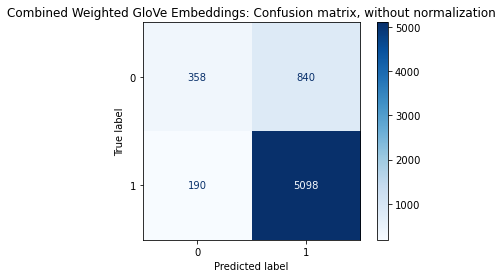

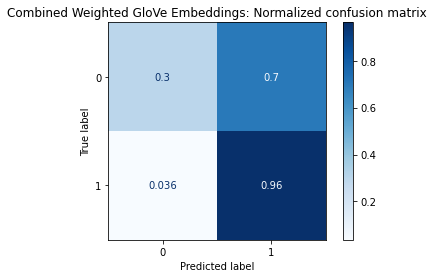


Classification Report:
                 precision    recall  f1-score   support

Not Recommended       0.65      0.30      0.41      1198
    Recommended       0.86      0.96      0.91      5288

       accuracy                           0.84      6486
      macro avg       0.76      0.63      0.66      6486
   weighted avg       0.82      0.84      0.82      6486



In [147]:
# Handle potential NaN values in combined GloVe representations
combined_glove = np.nan_to_num(combined_glove_dvs)
combined_weighted_glove = np.nan_to_num(combined_weighted_glove_dvs)

# Create a separate results dictionary for combined features
combined_results = {}

# Evaluate all three combined feature representations
print("\n\n==== EVALUATING COMBINED FEATURES (TITLE + REVIEW TEXT) ====\n")

combined_results['Count Vectors'] = evaluate_title_features("Combined Count Vectors", 
                                                           combined_count_features, 
                                                           labels, 
                                                           seed)

combined_results['GloVe Embeddings'] = evaluate_title_features("Combined GloVe Embeddings", 
                                                              combined_glove, 
                                                              labels, 
                                                              seed)

combined_results['Weighted GloVe Embeddings'] = evaluate_title_features("Combined Weighted GloVe Embeddings", 
                                                                       combined_weighted_glove, 
                                                                       labels, 
                                                                       seed)

### Combined Features (Title + Review) Classification Analysis

Based on the evaluation of combined features (title + review text):

#### Count Vector (Bag-of-Words) for Combined Features
- Achieves the highest accuracy (0.89) and F1-score (0.93) among all models.
- Most effective at identifying negative reviews while maintaining high precision for positive ones.

#### Unweighted GloVe Embeddings for Combined Features
- Performance: 83.2% accuracy and 0.90 F1-score.
- Still struggles with identifying negative reviews.

#### TF-IDF Weighted GloVe Embeddings for Combined Features
- Performance is nearly identical to unweighted embeddings (83.4% accuracy, 0.91 F1-score).
- TF-IDF weighting continues to provide minimal improvement over unweighted embeddings.

Let build cross validation for combine both title and reviews

In [148]:
# Create separate DataFrames for accuracy and F1 for combined features
metrics_f1_combined = ['count_f1_combined', 'unweighted_f1_combined', 'weighted_f1_combined']
metrics_acc_combined = ['count_acc_combined', 'unweighted_acc_combined', 'weighted_acc_combined']

cv_df_f1_combined = pd.DataFrame(columns=metrics_f1_combined, index=range(num_folds))
cv_df_acc_combined = pd.DataFrame(columns=metrics_acc_combined, index=range(num_folds))

fold = 0
for train_index, test_index in kf.split(list(range(0, len(labels)))):
    y_train = [labels[i] for i in train_index]
    y_test = [labels[i] for i in test_index]

    # Count vector on combined title + review text
    acc, f1 = evaluate(combined_count_features[train_index], combined_count_features[test_index], y_train, y_test, seed)
    cv_df_f1_combined.loc[fold, 'count_f1_combined'] = f1
    cv_df_acc_combined.loc[fold, 'count_acc_combined'] = acc

    # Unweighted GloVe on combined text
    acc, f1 = evaluate(combined_glove[train_index], combined_glove[test_index], y_train, y_test, seed)
    cv_df_f1_combined.loc[fold, 'unweighted_f1_combined'] = f1
    cv_df_acc_combined.loc[fold, 'unweighted_acc_combined'] = acc

    # TF-IDF Weighted GloVe on combined text
    acc, f1 = evaluate(combined_weighted_glove[train_index], combined_weighted_glove[test_index], y_train, y_test, seed)
    cv_df_f1_combined.loc[fold, 'weighted_f1_combined'] = f1
    cv_df_acc_combined.loc[fold, 'weighted_acc_combined'] = acc

    fold += 1

In [149]:
# Display accuracy results for each fold
cv_df_acc_combined

,count_acc_combined,unweighted_acc_combined,weighted_acc_combined
0,0.891885,0.840499,0.839735
1,0.890104,0.852709,0.845332
2,0.892875,0.85598,0.84402
3,0.88855,0.848092,0.838931
4,0.894656,0.852417,0.842494


In [150]:
# Calculate mean accuracy across folds
cv_df_acc_combined.mean()

count_acc_combined         0.891614
unweighted_acc_combined    0.849939
weighted_acc_combined      0.842103
dtype: float64

In [151]:
# Display F1 scores for each fold
cv_df_f1_combined

,count_f1_combined,unweighted_f1_combined,weighted_f1_combined
0,0.934946,0.906516,0.907244
1,0.934347,0.914159,0.910981
2,0.935833,0.915623,0.909866
3,0.932863,0.910909,0.906733
4,0.937406,0.91387,0.909384


In [152]:
# Calculate mean F1 scores across folds
cv_df_f1_combined.mean()

count_f1_combined         0.935079
unweighted_f1_combined    0.912215
weighted_f1_combined      0.908842
dtype: float64


From above experiments, we conducted training and evaluation of **logistic regression models** using three different feature representations for titles and reivews:

- **Count Vector (Bag-of-Words)**
- **Unweighted GloVe Embeddings**
- **TF-IDF Weighted GloVe Embeddings**

Each model was evaluated using **5-fold cross-validation**.
### **Key Findings**
- Strongest performance from combined inputs: using both the title and full review text together led to the best F1-scores across all model types. The count vector (bag-of-words) approach performed the best, reaching an impressive 93.51%, showing that merging different text sources clearly helps.
- Clear model ranking remains: the bag-of-words model still comes out on top, performing about 2.3% better than the embedding-based models—just like it did when using titles or reviews alone.
- Slight edge for unweighted embeddings: the unweighted GloVe embeddings slightly beat out the TF-IDF weighted versions by 0.34%, suggesting that adding weights may actually introduce noise.
- Small but meaningful improvement: adding review text to the titles improves performance by 1.29% (from 92.22% to 93.51%). While not a huge leap, it shows that full reviews add helpful context, even if titles already carry a lot of the signal.

---

### **Analysis**
- Putting titles and reviews together does help classification, but the relatively small improvement shows that titles alone do a greate job. This is useful for systems, where titles are quicker to process and still give you most of the performance you'd get from using everything.
- The fact that simple bag-of-words features beat word embeddings—even when combining texts—suggests that specific words matter more than their deeper meanings in this classification. People often make their opinions clear through direct language, especially in titles.
- The small drop in performance when using TF-IDF-weighted embeddings hints that extra complexity can sometimes hurt rather than help. In these cases, keeping it simple may be the better choice.
- For apply to build applications, this suggests a smart method such as layered strategy: use a lightweight title-only model for most cases, and bring in the full reviews only when you need more confidence without overloading the system.


In [153]:
# Combined results from all three cross-validation dataframes
combined_metrics_f1 = pd.concat([
    cv_df_f1.mean().rename(lambda x: x.replace('_review', '')),
    cv_df_f1_title.mean().rename(lambda x: x.replace('_title', '')),
    cv_df_f1_combined.mean().rename(lambda x: x.replace('_combined', ''))
], axis=1)

combined_metrics_f1.columns = ['Review Only', 'Title Only', 'Combined']
combined_metrics_f1

,Review Only,Title Only,Combined
count_f1,0.924869,0.922155,0.935079
unweighted_f1,0.901125,0.902192,0.912215
weighted_f1,0.901559,0.902964,0.908842


In [154]:
# Combined results from all three cross-validation dataframes for accuracy
combined_metrics_acc = pd.concat([
    cv_df_acc.mean().rename(lambda x: x.replace('_review', '')),
    cv_df_acc_title.mean().rename(lambda x: x.replace('_title', '')),
    cv_df_acc_combined.mean().rename(lambda x: x.replace('_combined', ''))
], axis=1)

combined_metrics_acc.columns = ['Review Only', 'Title Only', 'Combined']
combined_metrics_acc

,Review Only,Title Only,Combined
count_acc,0.873957,0.865764,0.891614
unweighted_acc,0.825310,0.829890,0.849939
weighted_acc,0.825158,0.829279,0.842103


### Model comparison summary
This study evaluated different text representation techniques for predicting clothing review recommendations, comparing bag-of-words (count vectors) against GloVe embeddings (both weighted and unweighted) across three information sources (review text, titles, and combined).

#### Information source comparison
- Combined (title + review) > Review only > Title only when using count vectors.
- Titles alone perform well, achieving an F1-score with count vectors.
#### Feature representation performance
- Count vectors consistently outperform GloVe embeddings for all cases.
- The gap between count vectors and embeddings is largest for review text and combined sources.
- For titles alone, the performance difference between methods is smaller.
#### Embedding performance
- Weighted and unweighted GloVe embeddings perform nearly identically across all sources.
- This confirms that TF-IDF weighting offers minimal benefit in this task.

## Reference
- Activities and labs files for this course. 
- Github Copilot